# 학생의 성적에 영향을 미치는 요인 파악
- 4기 박정민

## 데이터 셋

- Kaggle : Student Performance Factors  
https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data


## 라이브러리 및 데이터 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/EPOCH4기/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 컬럼 설명

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

1. Hours_Studied : Number of hours spent studying per week. (한 주 동안 공부한 시간 (주당 학습 시간))
2. Attendance	 : Percentage of classes attended.  (수업 출석률 (전체 수업 대비 출석한 비율))
3. Parental_Involvement	: Level of parental involvement in the student's education (Low, Medium, High).  (학부모의 교육 참여 수준 (낮음, 보통, 높음))
4. Access_to_Resources	: Availability of educational resources (Low, Medium, High).  (학습 자원 접근 가능 여부 (낮음, 보통, 높음))
5. Extracurricular_Activities	: Participation in extracurricular activities (Yes, No). (비교과 활동(동아리, 스포츠 등) 참여 여부 (예/아니오))  
6. Sleep_Hours : Average number of hours of sleep per night.  (하루 평균 수면 시간 (시간 단위))
7. Previous_Scores	: Scores from previous exams.  (이전 시험 성적)
8. Motivation_Level : Student's level of motivation (Low, Medium, High).  (학생의 학습 동기 수준 (낮음, 보통, 높음))
9. Internet_Access	: Availability of internet access (Yes, No).  (인터넷 접속 가능 여부 (예/아니오))
10. Tutoring_Sessions : Number of tutoring sessions attended per month.  (한 달 기준 과외·보충 수업 횟수)
11. Family_Income	 : Family income level (Low, Medium, High).  (가정의 소득 수준 (낮음, 보통, 높음))
12. Teacher_Quality	: Quality of the teachers (Low, Medium, High).  (교사의 수업 질 평가 (낮음, 보통, 높음))
13. School_Type	: Type of school attended (Public, Private).  (학교 유형 (공립, 사립))
14. Peer_Influence	: Influence of peers on academic performance (Positive, Neutral, Negative).  (또래 집단이 학업에 미치는 영향 (긍정적, 중립적, 부정적))
15. Physical_Activity : Average number of hours of physical activity per week.  (주당 평균 신체 활동(운동) 시간)
16. Learning_Disabilities	 : Presence of learning disabilities (Yes, No).  (학습 장애 여부 (예/아니오))
17. Parental_Education_Level : Highest education level of parents (High School, College, Postgraduate).  (부모의 최고 학력 (고등학교, 대학교, 대학원 이상))
18. Distance_from_Home	 : Distance from home to school (Near, Moderate, Far).  (집과 학교 간 거리 (가까움, 보통, 멀음))
19. Gender : Gender of the student (Male, Female).  (학생의 성별 (남, 여))
20. Exam_Score	 :  Final exam score.   (최종 시험 점수)

- 6607개의 데이터, 20개의 컬럼이 존재.
- 숫자형 변수(int64) : Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score (7개)
- 범주형 변수(object) : Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender (13개)

## EDA 과정

In [5]:
# 데이터 행, 열 확인
df.shape

(6607, 20)

In [7]:
# 기초통계량 확인
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
# 결측치 확인
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [25]:
# 숫자형, 카테고리형 저장
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

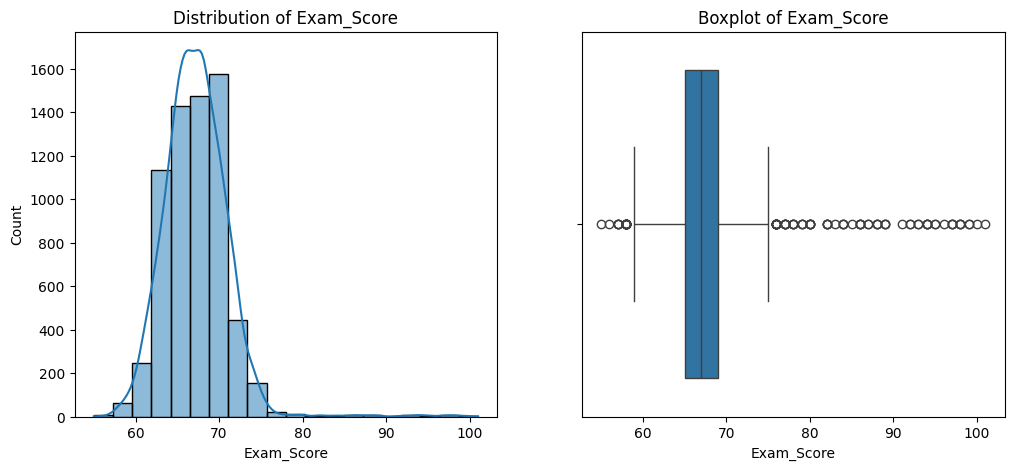

In [19]:
# 목표변수 Exam_Score EDA
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Exam_Score'], kde=True, bins=20)
plt.title("Distribution of Exam_Score")

plt.subplot(1,2,2)
sns.boxplot(x=df['Exam_Score'])
plt.title("Boxplot of Exam_Score")

plt.show()

In [12]:
print(df['Exam_Score'].describe())

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


In [20]:
# 숫자형 변수 EDA

import plotly.subplots as sp
import plotly.graph_objects as go

num_cols = df.select_dtypes(exclude='O')

cols = 2
rows = (len(num_cols.columns) + 1) // cols

fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=[col for col in num_cols.columns])


for i, column in enumerate(num_cols.columns):
    row = (i // cols) + 1
    col = (i % cols) + 1

    count_df = df[column].value_counts().reset_index()
    count_df.columns = [column, 'count']
    count_df = count_df.sort_values(by=column)

    fig.add_trace(
        go.Scatter(
            x=count_df[column],
            y=count_df['count'],
            mode='lines',
            name=column,
            fill='tozeroy'
        ),
        row=row, col=col
    )

fig.update_layout(
    height=1000, width=1000,
    template='plotly_white'
)

fig.show()

In [21]:
# 범주형 변수 EDA

cat_cols = df.select_dtypes(include='O')

cols = 2
rows = (len(cat_cols.columns) + 1) // cols

colors = ['#404546', '#4C6B73', '#7492C1', '#8A7D4C', '#A7B7A7', '#A69585', '#6D7F8C',
          '#4F7D9E', '#82A1B2', '#A19B8F', '#B59A6A', '#9A7A48', '#706E4C']


fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=[col for col in cat_cols.columns])

for i, column in enumerate(cat_cols.columns):
    row = (i // cols) + 1
    col = (i % cols) + 1

    count_df = df[column].value_counts().reset_index()
    count_df.columns = [column, 'count']

    fig.add_trace(
        go.Bar(x=count_df[column], y=count_df['count'], name=column, marker_color=colors[i],text=count_df['count'],textposition='auto'),
        row=row, col=col
    )

fig.update_layout(
    height=2500, width=800,
    showlegend=True,
    template='plotly_white'
)

fig.show()

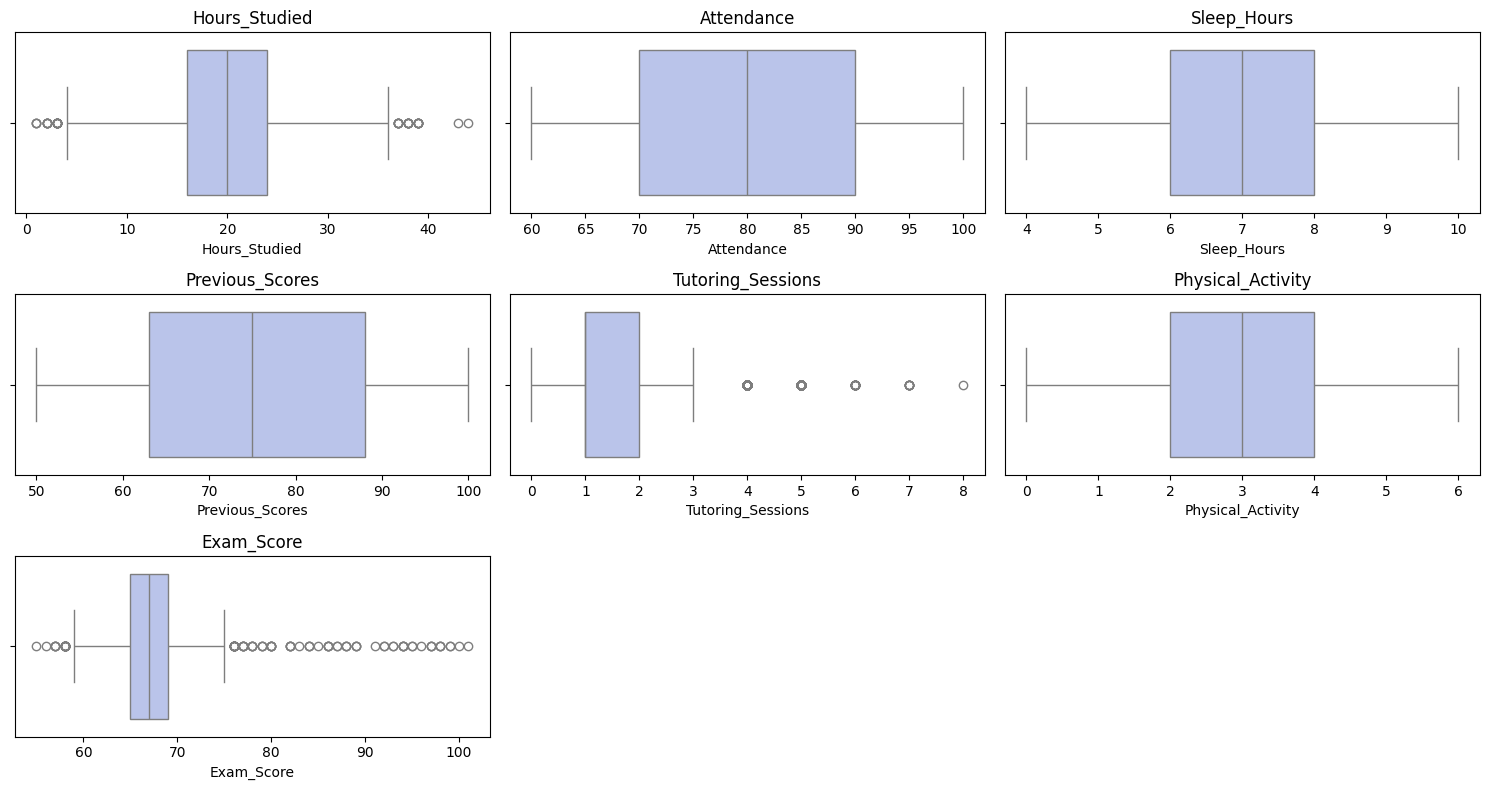

In [26]:
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color = '#B2C0F2')
    plt.title(col)

plt.tight_layout()
plt.show()

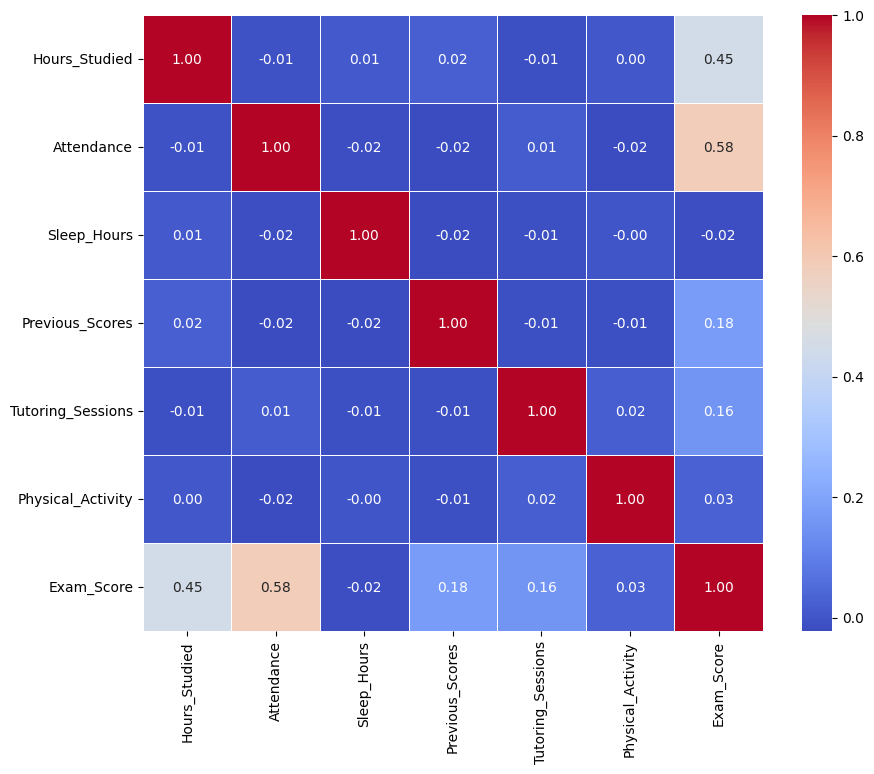

In [27]:
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

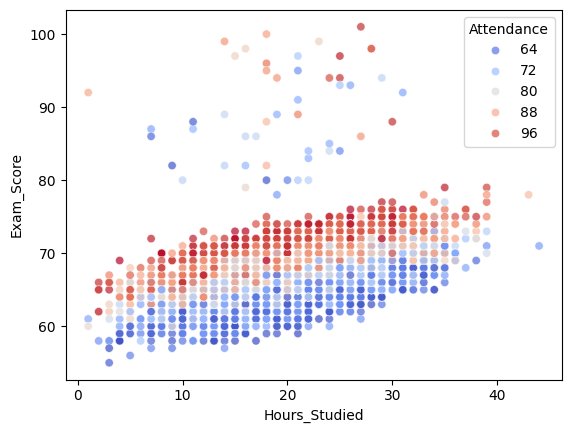

In [28]:
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score",
    hue="Attendance", palette="coolwarm", alpha=0.7)

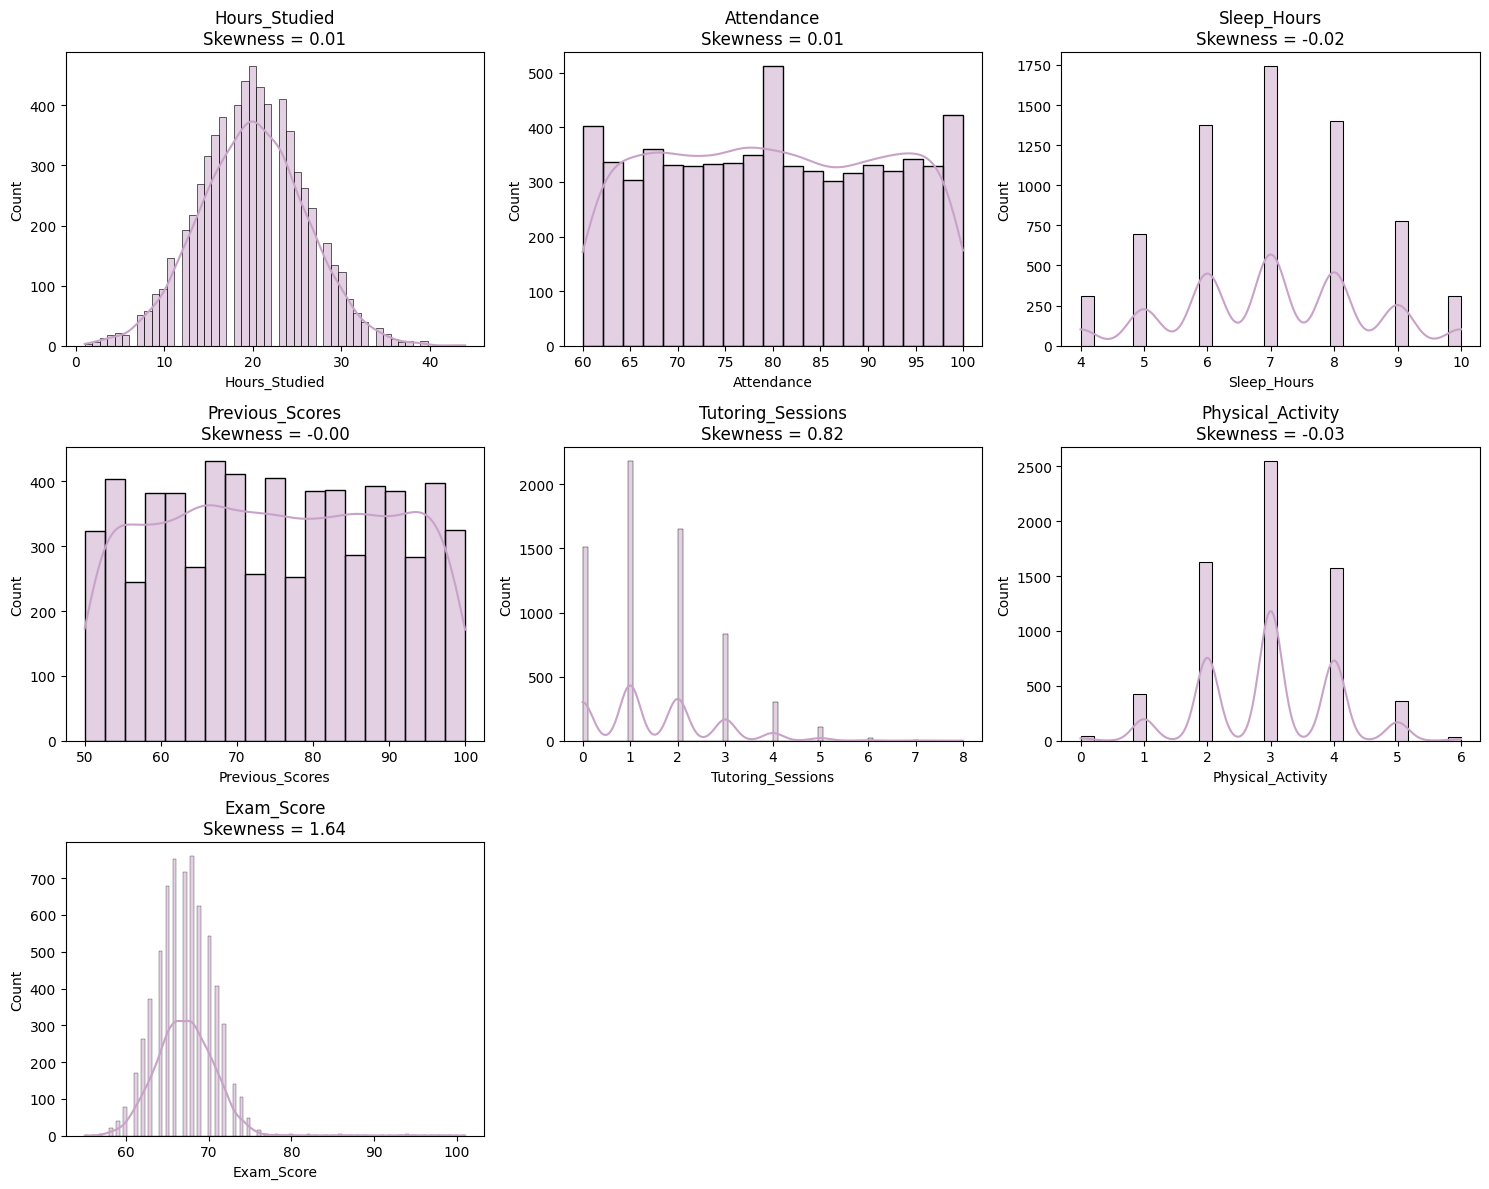

In [30]:
# 왜도 값 확인을 위한 히스토그램
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # 3행 3열
    sns.histplot(df[col], kde=True, color="#C8A2C8")
    skew_val = df[col].skew()
    plt.title(f"{col}\nSkewness = {skew_val:.2f}")

plt.tight_layout()
plt.show()

## 데이터 전처리

### 1. 데이터 클린업

In [53]:
# 다시 결측치 확인
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


- 총 3개의 컬럼에서 결측치 발견 : Teacher_Quality, Parental_Education_Level, Distance_from_Home
- 3개 모두 dtype이 object인 범주형 변수이다.
- 결측치가 존재하는 행은 총 229개로 약 3.466%이다.

In [54]:
# 결측치가 존재하는 컬럼
missing_subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
missing_rows = df[df[missing_subset].isnull().any(axis=1)]
missing_rows

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70
6594,9,90,High,High,Yes,7,79,Low,Yes,4,High,High,Public,Positive,4,No,High School,NaN,Male,70


#### Teacher_Quality 변수 살펴보기
- 결측치가 총 78개 존재

In [55]:
# 고유값 확인
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
Medium,3925
High,1947
Low,657


#### Parental_Education_Level 변수 살펴보기
- 결측치가 총 90개 존재


In [56]:
# 고유값 확인
df['Parental_Education_Level'].value_counts()

,count
Parental_Education_Level,
High School,3223
College,1989
Postgraduate,1305


#### Distance_from_Home 변수 살펴보기
- 결측치가 총 67개 존재

In [57]:
# 고유값 확인
df['Distance_from_Home'].value_counts()

,count
Distance_from_Home,
Near,3884
Moderate,1998
Far,658


- 결측치가 존재하는 행을 제거하면 데이터 손실이 약 3.466% 이기에 손실률이 낮은 편이다.
- 최빈값으로 대체했을 때 생길 편향 위험과 제거시 3.466% 라는 적은 손실률을 근거로 제거하기로 판단하였다.

In [58]:
# 결측치가 존재하는 3개 변수
missing_subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# 결측치가 있는 행 제거
df_clean = df.dropna(subset=missing_subset)

# 결과 확인
print("원래 데이터 크기:", df.shape)
print("결측치 제거 후 데이터 크기:", df_clean.shape)

원래 데이터 크기: (6607, 20)
결측치 제거 후 데이터 크기: (6378, 20)


#### 중복 데이터 확인

In [59]:
# 전체 중복 행 개수 확인
duplicates = df_clean.duplicated().sum()
print("중복된 행 개수:", duplicates)

중복된 행 개수: 0


In [60]:
# 인덱스 초기화
df_clean = df_clean.reset_index(drop=True)

# 확인
print(df_clean.head())
print(df_clean.index)

   Hours_Studied  Attendance  ...  Gender Exam_Score
0             23          84  ...    Male         67
1             19          64  ...  Female         61
2             24          98  ...    Male         74
3             29          89  ...    Male         71
4             19          92  ...  Female         70

[5 rows x 20 columns]
RangeIndex(start=0, stop=6378, step=1)


### 2. 변수 타입 정리

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [63]:
# 다시 숫자형 변수형으로 나누기
num_cols = df_clean.select_dtypes(include=['int64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


- num_cols : 숫자형 변수 7개
- cat_cols : 범주형 변수 13개

### 3. 이상치 탐색 및 처리

In [64]:
df_clean.describe()  # 숫자형 변수의 통계정보 확인

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


- 목표변수 Exam_Score에 101점이 존재한다.
- 데이터 입력 오류 가능성이 높기에 101점을 제거하는게 좋아보인다.

In [65]:
df_clean = df_clean[df_clean['Exam_Score'] <= 100]
df_clean.shape

(6377, 20)

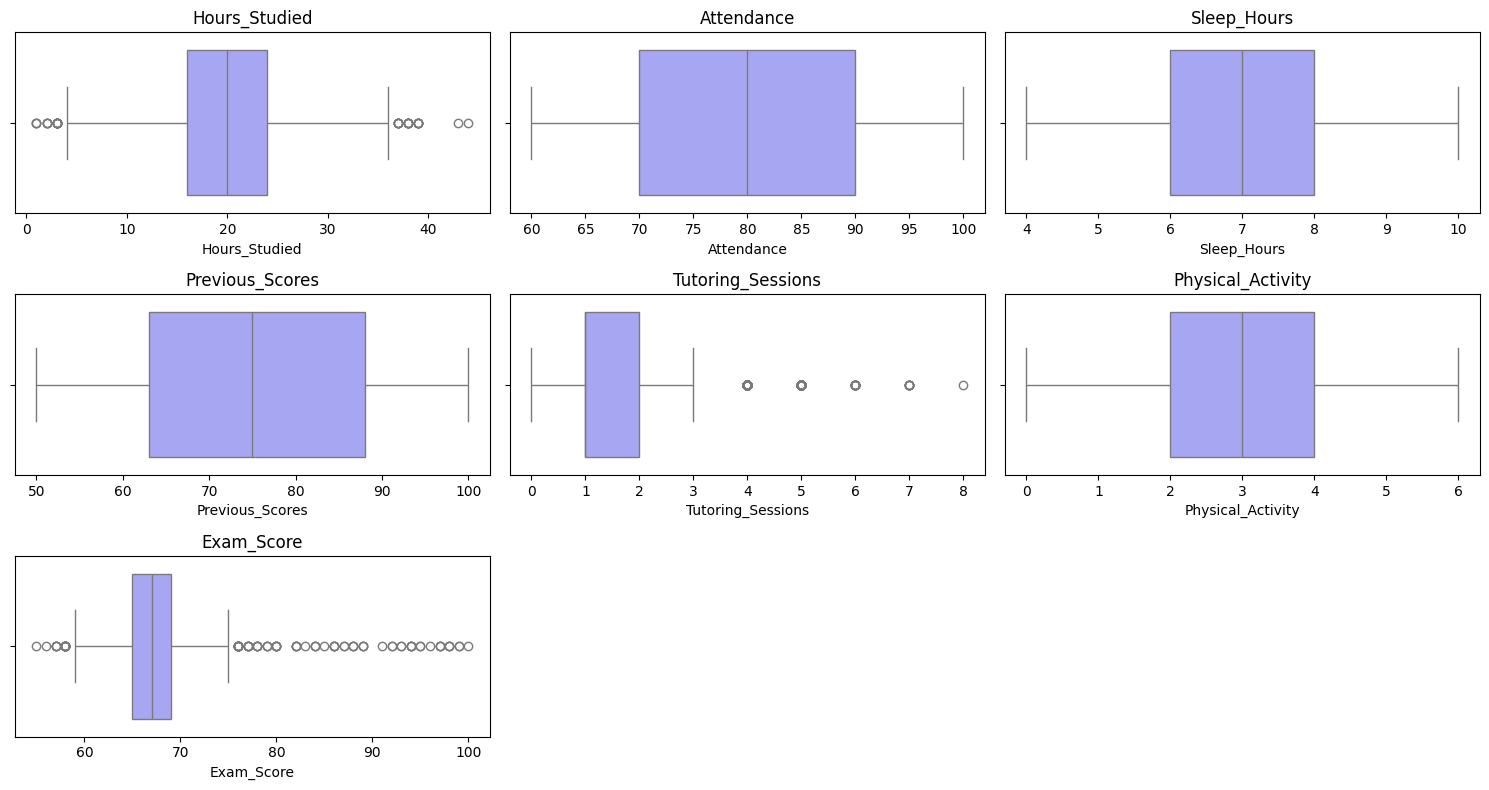

In [66]:
# 이상치 확인용 boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)   # 3행 3열 배치 (변수 개수 맞춰 자동 조정)
    sns.boxplot(x=df_clean[col], color="#9999FF")  # 연보라색
    plt.title(col)

plt.tight_layout()
plt.show()

- 현재 IQR방식으로 이상치를 판단하자면, Hours_Studied, Tutoring_Sessions, Exam_Score가 이상치가 있는 것으로 판단되지만, 대부분 합리적으로 값들이 존재하므로 일단은 이상치를 제거하지 않는 방향으로 진행하겠음.

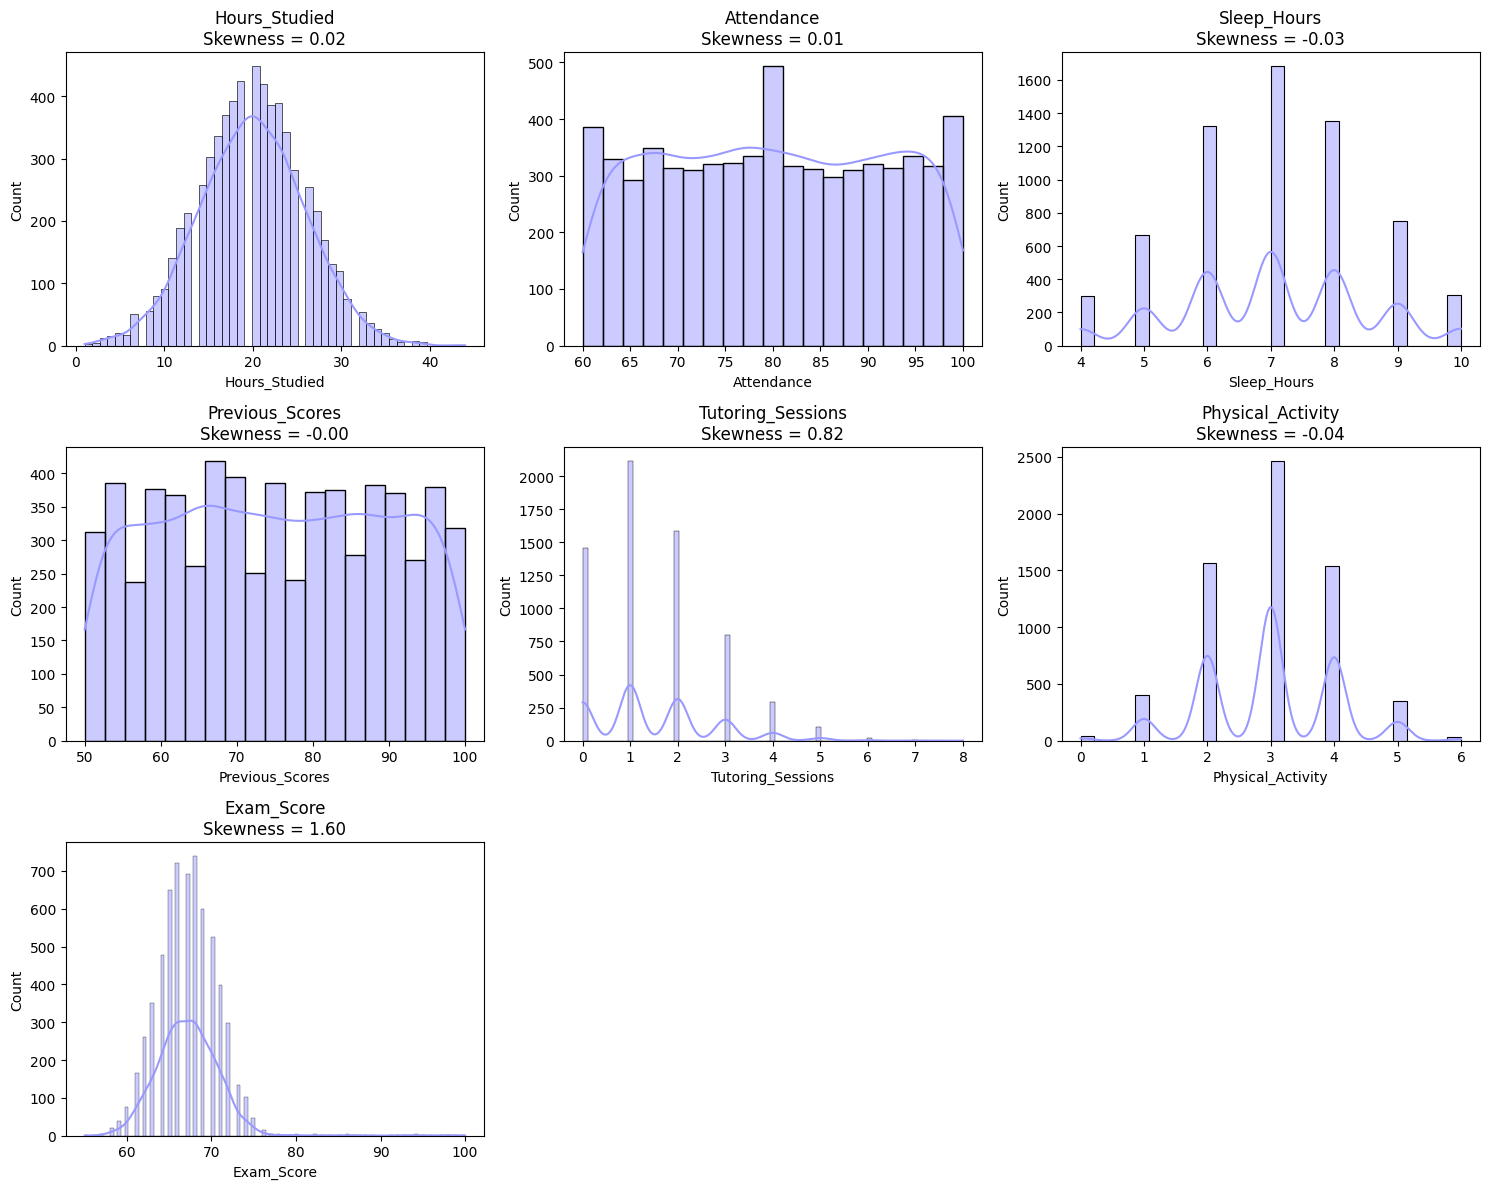

In [67]:
# 왜도 값 확인을 위한 히스토그램
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # 3행 3열
    sns.histplot(df_clean[col], kde=True, color="#9999FF")
    skew_val = df_clean[col].skew()
    plt.title(f"{col}\nSkewness = {skew_val:.2f}")

plt.tight_layout()
plt.show()

### 4. 범주형 변수 인코딩

- 순서가 중요한 범주형 변수의 경우 Label Encoding을, 명목형 변수인 경우 One-Hot Encoding을 진행하자.
- 순서가 중요한 변수 : Motivation_Level, Parental_Education_Level, Teacher_Quality, Access_to_Resources, Family_Income, Peer_Influence, Distance_from_Home (13개 중 7개)
- 명목형 변수 : Gender, School_Type, Extracurricular_Activities, Internet_Access, Learning_Disabilities, Parental_Involvement (13개 중 6개)

In [68]:
# 순서형 변수 매핑
ordinal_map = {
    "Motivation_Level": {"Low": 1, "Medium": 2, "High": 3},
    "Parental_Education_Level": {"High School": 1, "College": 2, "Postgraduate": 3},
    "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
    "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
    "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
    "Peer_Influence": {"Negative": 1, "Neutral": 2, "Positive": 3},
    "Distance_from_Home": {"Near": 1, "Moderate": 2, "Far": 3}
}

for col, mapping in ordinal_map.items():
    df_clean[col] = df_clean[col].map(mapping)

# 명목형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(
    df_clean,
    columns=['Gender','School_Type','Extracurricular_Activities',
             'Internet_Access','Learning_Disabilities','Parental_Involvement'],
    drop_first=True,   # 다중공선성 방지를 위해 첫 번째 범주는 제거
    dtype=int
)

print("인코딩 후 데이터 shape:", df_encoded.shape)

인코딩 후 데이터 shape: (6377, 21)


In [69]:
df_encoded.head()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
0,23,84,3,7,73,1,0,1,2,3,3,1,1,67,1,1,0,1,0,1,0
1,19,64,2,8,59,1,2,2,2,1,4,2,2,61,0,1,0,1,0,1,0
2,24,98,2,7,91,2,2,2,2,2,4,3,1,74,1,1,1,1,0,0,1
3,29,89,2,8,98,2,1,2,2,1,4,1,2,71,1,1,1,1,0,1,0
4,19,92,2,6,65,2,3,2,3,2,4,2,1,70,0,1,1,1,0,0,1


In [70]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6377 non-null   int64
 1   Attendance                      6377 non-null   int64
 2   Access_to_Resources             6377 non-null   int64
 3   Sleep_Hours                     6377 non-null   int64
 4   Previous_Scores                 6377 non-null   int64
 5   Motivation_Level                6377 non-null   int64
 6   Tutoring_Sessions               6377 non-null   int64
 7   Family_Income                   6377 non-null   int64
 8   Teacher_Quality                 6377 non-null   int64
 9   Peer_Influence                  6377 non-null   int64
 10  Physical_Activity               6377 non-null   int64
 11  Parental_Education_Level        6377 non-null   int64
 12  Distance_from_Home              6377 non-null   int64
 13  Exam_Sco

### 5. 스케일링

- 치우침이 존재하던 Tutoring_Sessions의 값이 0 ~ 8이므로 로그변환을 진행할지 말지에 대한 고려를 해야함.
- 원본과 로그변환 후의 분포 비교 진행.
- 모델링 과정에서 트리 기반 모델을 사용할 경우 원본데이터로 모델링 진행하는게 바람직해보임.

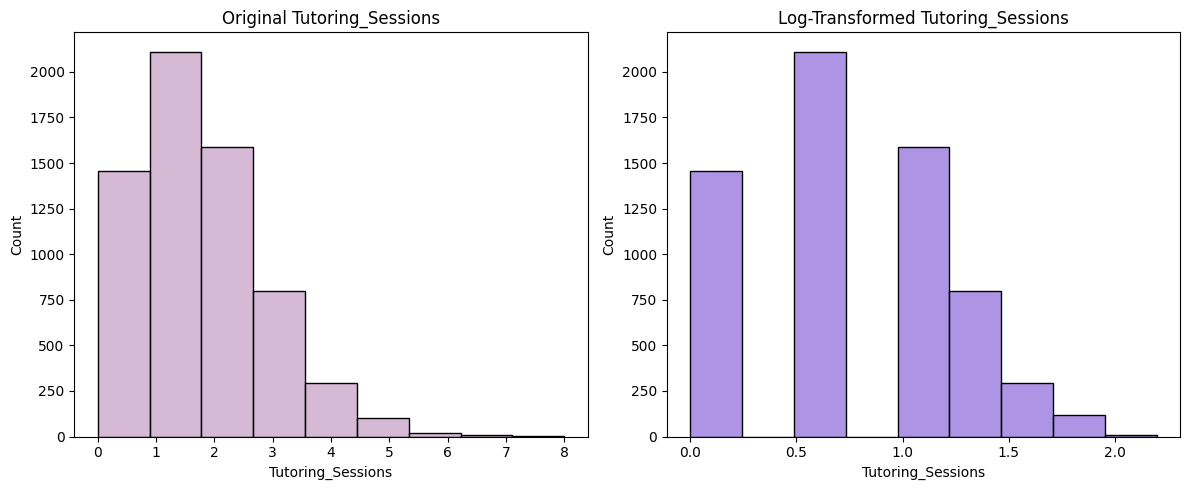

In [71]:
plt.figure(figsize=(12,5))

# 원본 분포
plt.subplot(1,2,1)
sns.histplot(df_encoded['Tutoring_Sessions'], bins=9, color="#C8A2C8", kde=False)
plt.title("Original Tutoring_Sessions")

# 로그 변환 분포
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_encoded['Tutoring_Sessions']), bins=9, color="#9370DB", kde=False)
plt.title("Log-Transformed Tutoring_Sessions")

plt.tight_layout()
plt.show()

- 현재 로그변환을 진행하였을 경우 왜도가 줄어듬이 보이므로 BaseLine인 선형회귀 모델링 단계에서는 로그변환을 하여 모델 적합을 진행하는게 좋아보임.

In [72]:
# 1) 원본 데이터셋 (트리 모델용)
df_tree = df_encoded.copy()

# 2) 로그 변환 데이터셋 (선형 회귀용)
df_linear = df_encoded.copy()
df_linear['Tutoring_Sessions'] = np.log1p(df_linear['Tutoring_Sessions'])

- 로그변환을 진행하였고, 기초통계량을 보며 어떠한 스케일링 방법이 좋을 지 확인해야함.

In [73]:
df_linear.describe()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,2.098165,7.035126,75.063353,1.908107,0.787520,1.787831,2.197115,2.191626,2.972714,1.705504,1.503685,67.246825,0.578328,0.695154,0.596832,0.924102,0.104751,0.202289,0.509801
std,5.985283,11.549434,0.698689,1.468091,14.399766,0.695720,0.516659,0.743430,0.601027,0.756386,1.029006,0.780581,0.670465,3.891637,0.493865,0.460378,0.490572,0.264855,0.306257,0.401738,0.499943
min,1.000000,60.000000,1.000000,4.000000,50.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,2.000000,6.000000,63.000000,1.000000,0.693147,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,65.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,20.000000,80.000000,2.000000,7.000000,75.000000,2.000000,0.693147,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,67.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,24.000000,90.000000,3.000000,8.000000,88.000000,2.000000,1.098612,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,69.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,44.000000,100.000000,3.000000,10.000000,100.000000,3.000000,2.197225,3.000000,3.000000,3.000000,6.000000,3.000000,3.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 현재 극단적으로 큰 값이 존재하지 않고, 0에서 100사이에 값들이 존재하므로, StandardScaler를 이용하여 우선적으로 진행하는게 좋아보임.
- 스케일링 전에 주의할 점
> - 목표변수 Exam_Score는 스케일링을 하지 않는다.
> - 훈련셋과 테스트셋을 분리한 후 스케일링을 진행한다.
> - 더미변수는 꼭 스케일링할 필요가 없다.

### 6. 피처 엔지니어링

피처 엔지니어링으로 할 수 있는 다양한 방법에 대해 생각해보자.

- 파생 변수 생성
> - 수면 시간을 구간화
> - 출석률 구간화

- 변수 간 상호작용
> - 공부시간 * 동기레벨 => 공부효율이 달라질 수 있다.
> - 가족소득 * 자원 접근성 => 질 좋은 공부로 인한 성적 상승을 기대할 수 있다.
> - 수면시간 * 야외활동여부 => 건강한 맨탈로 성적 상승을 기대할 수 있다.

=> 다음과 같은 피처들로 인해 변수의 개수가 너무 많아지기에 적용할지에 대한 여부는 이후 모델링 과정에서의 정확성과 해석여부에 따라 파생변수를 추가하고 다른 의미 없는 피처를 제거하는 과정을 진행하고자 한다.

In [ ]:
# df_features = df_linear.copy()

# # 파생 변수 생성
# df_features['Study_Efficiency'] = df_features['Exam_Score'] / (df_features['Hours_Studied'] + 1)  # 0으로 나눔 방지
# df_features['Improvement'] = df_features['Exam_Score'] - df_features['Previous_Scores']

# # 구간화 (Binning)
# df_features['Sleep_Category'] = pd.cut(df_features['Sleep_Hours'],
#                                        bins=[0, 5, 8, 12],
#                                        labels=['Low', 'Normal', 'High'])

# df_features['Attendance_Level'] = pd.cut(df_features['Attendance'],
#                                          bins=[0, 60, 85, 100],
#                                          labels=['Low', 'Medium', 'High'])

# # 상호작용 변수
# df_features['Study_Motivation'] = df_features['Hours_Studied'] * df_features['Motivation_Level']
# df_features['Resource_Income'] = df_features['Access_to_Resources'] * df_features['Family_Income']

# # 이진 변수 (고득점자 여부)
# df_features['High_Achiever'] = (df_features['Previous_Scores'] > 85).astype(int)

# # 원-핫 인코딩 (새로운 범주형 컬럼들 변환)
# df_features = pd.get_dummies(df_features,
#                              columns=['Sleep_Category', 'Attendance_Level'],
#                              drop_first=True, dtype=int)

# print("피처 엔지니어링 후 shape:", df_features.shape)
# df_features.head()


## 모델링

### 1. 단순 선형 회귀 (Linear Regression)

- 학생의 성적에 영향을 미치는 요인을 파악하기 위해 목표변수 Exam_score에 대한 회귀를 진행하기 위해 가장 기초가 되는 Baseline으로 선형회귀를 진행한다.
- 선형 회귀에 있어서 요인에 중점을 두기에 statsmodels의 OLS 함수를 이용한다.

In [75]:
df_linear.info()  # 다시 정보 확인

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hours_Studied                   6377 non-null   int64  
 1   Attendance                      6377 non-null   int64  
 2   Access_to_Resources             6377 non-null   int64  
 3   Sleep_Hours                     6377 non-null   int64  
 4   Previous_Scores                 6377 non-null   int64  
 5   Motivation_Level                6377 non-null   int64  
 6   Tutoring_Sessions               6377 non-null   float64
 7   Family_Income                   6377 non-null   int64  
 8   Teacher_Quality                 6377 non-null   int64  
 9   Peer_Influence                  6377 non-null   int64  
 10  Physical_Activity               6377 non-null   int64  
 11  Parental_Education_Level        6377 non-null   int64  
 12  Distance_from_Home              6377 no

In [77]:
df_linear.head()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
0,23,84,3,7,73,1,0.000000,1,2,3,3,1,1,67,1,1,0,1,0,1,0
1,19,64,2,8,59,1,1.098612,2,2,1,4,2,2,61,0,1,0,1,0,1,0
2,24,98,2,7,91,2,1.098612,2,2,2,4,3,1,74,1,1,1,1,0,0,1
3,29,89,2,8,98,2,0.693147,2,2,1,4,1,2,71,1,1,1,1,0,1,0
4,19,92,2,6,65,2,1.386294,2,3,2,4,2,1,70,0,1,1,1,0,0,1


In [76]:
X = df_linear.drop(columns = 'Exam_Score').copy()  # 목표변수 제거
y = df_linear['Exam_Score']

In [78]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_scaled_const = sm.add_constant(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_const, y, test_size=0.2, random_state=100)

ols = sm.OLS(y_train, X_train).fit() # 학습
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     647.8
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:52:55   Log-Likelihood:                -10978.
No. Observations:                5101   AIC:                         2.200e+04
Df Residuals:                    5080   BIC:                         2.214e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

- OLS 전체 적합도
> - $R^2$ = 0.718, Adj_$R^2$ = 0.717 => 설명력 매우 양호
> - F-통계량 p-값 = 0.000 => 모형이 유의함
> - Durbin-Watson = 2.01 => 자기상관 문제는 없어 보임
> - Omnibus/JB 매우 큼, Skew 11.31, Kurtosis 137.69 => 잔차 정규성 문제가 존재

- 목표변수에 영향을 주는 유의미한 변수
> - 양의 효과
>> - Tutoring_Sessions
>> - Internet_Access_Yes
>> - Access_to_Resources
>> - Extracurricular_Activities_Yes
>> - Motivation_Level
>> - Family_Income
>> - Teacher_Quality
>> - Peer_Influence
>> - Parental_Education_Level
>> - Hours_Studied
>> - Attendance
>> - Physical_Activity
>> - Previous_Scores
> - 음의 효과
>> - Parental_Involvement_Low
>> - Parental_Involvement_Medium
>> - Learning_Disabilities_Yes
>> - Distance_from_Home
> - 유의하지 않은 변수
>> - Sleep_Hours (p=0.653)
>> - Gender_Male (p=0.348)
>> - School_Type_Public (p=0.911)

Text(0.5, 1.0, 'Residuals vs Leverage')

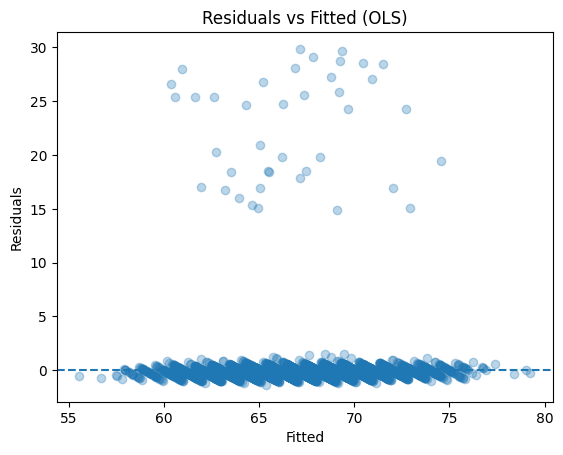

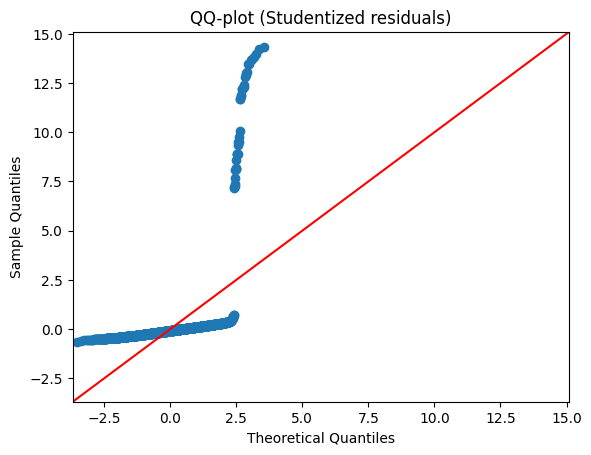

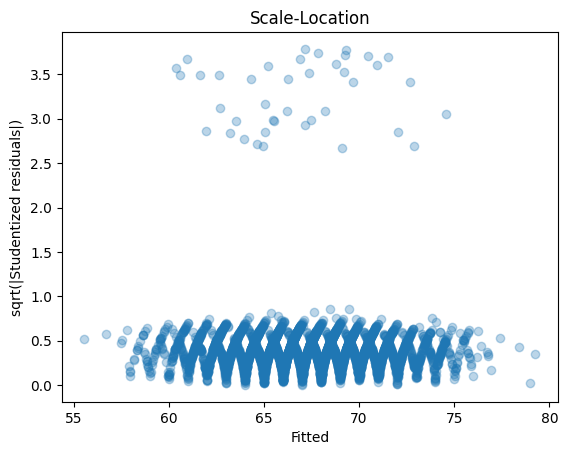

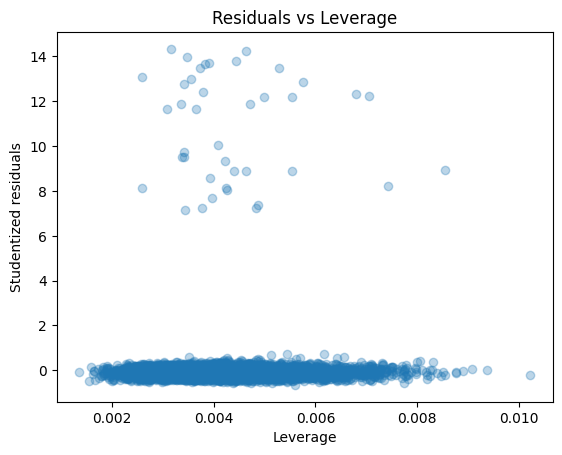

In [80]:
# 위에서 문제가 있던 잔차와 정규성에 대한 집중 파악을 위해 시각화 실시
fitted = ols.fittedvalues
resid  = ols.resid
infl   = ols.get_influence()
std_resid = infl.resid_studentized_internal
lev = infl.hat_matrix_diag

# 1) 산점도를 통한 잔차 그림
plt.figure()
plt.scatter(fitted, resid, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (OLS)')

# 2) QQ-plot (정규성)
sm.qqplot(std_resid, line='45')
plt.title('QQ-plot (Studentized residuals)')

# 3) 이분산성 파악을 위한 시각화
plt.figure()
plt.scatter(fitted, np.sqrt(np.abs(std_resid)), alpha=0.3)
plt.xlabel('Fitted')
plt.ylabel('sqrt(|Studentized residuals|)')
plt.title('Scale-Location')

# 4) Leverage 그래프 (+ 영향점 시사)
plt.figure()
plt.scatter(lev, std_resid, alpha=0.3)
plt.xlabel('Leverage')
plt.ylabel('Studentized residuals')
plt.title('Residuals vs Leverage')


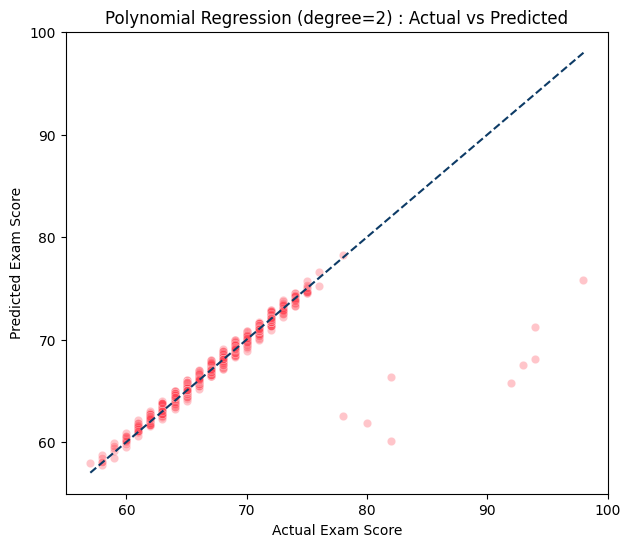

In [81]:
y_test_pred = ols.predict(X_test)
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Polynomial Regression (degree=2) : Actual vs Predicted")
plt.show()

In [82]:
# 선형회귀(OLS)의 MSE, RMSE, MAE 값

yhat = ols.fittedvalues
mse  = mean_squared_error(y_train, yhat)
rmse = mse ** 0.5
mae  = mean_absolute_error(y_train, yhat)

print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}")

MSE: 4.333545  RMSE: 2.081717  MAE: 0.511311


In [84]:
yhat_in = ols.fittedvalues
err = y - yhat_in

# 현재 지표 재확인
linear_mse  = np.mean(err**2)
linear_rmse = np.sqrt(mse)
linear_mae  = np.mean(np.abs(err))
print(f"MSE={mse:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}, RMSE/MAE={rmse/mae:.2f}")

# 1) 나이브(mean) 대비 개선율
rmse_naive = np.sqrt(np.mean((y - y.mean())**2))
mae_naive  = np.mean(np.abs(y - y.mean()))
print(f"Naive RMSE={rmse_naive:.4f}, MAE={mae_naive:.4f}")
print(f"RMSE 개선율={(1 - rmse/rmse_naive)*100:.2f}%  MAE 개선율={(1 - mae/mae_naive)*100:.2f}%")

# 2) 정규화 지표(NRMSE) - 표준편차/사분위범위/범위 기준
sd  = np.std(y, ddof=0)
iqr = np.subtract(*np.percentile(y, [75,25]))
rng = y.max() - y.min()
print(f"NRMSE(sd)={rmse/sd:.4f}  NRMSE(IQR)={rmse/iqr:.4f}  NRMSE(range)={rmse/rng:.4f}")

MSE=4.3335, RMSE=2.0817, MAE=0.5113, RMSE/MAE=4.07
Naive RMSE=3.8913, MAE=2.8540
RMSE 개선율=46.50%  MAE 개선율=82.08%
NRMSE(sd)=0.5350  NRMSE(IQR)=0.5204  NRMSE(range)=0.0463


- 현재 선형회귀의 경우 MAE=0.5113으로 굉장히 양호한 편이나, MSE값이 4 이상이기에 가장 이상적인 MSE < 1에 한참 못미치는 경향을 띈다고 볼 수 있다.
- 선형회귀의 경우 가장 단순한 모델인 나이브 베이즈 대비 얼만큼의 개선율을 보이는 지 알기 위해 개선율 계산 결과 46.5%, 82.08% 로 평균만 찍는 모델보다 상당히 낫다는 근거가 있다고 볼 수 있다.
- 하지만 위에서 보았던 것처럼 잔차 정규성에 위배가 되는 값이 존재하므로 이는 소수의 두꺼운 꼬리가 존재함을 알 수 있다.
- 하지만 나이브 베이즈보다 성능이 좋으므로 이는 'BaseLine'자체는 의미가 있다고 볼 수 있다.

### 2. RandomForest & XGBoost & HistGradientBoosting

In [85]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor

# df_tree 데이터프레임 선택 (Turtoring_Session의 비대칭성을 스케일링하지 않은 데이터)
y = df_tree["Exam_Score"].values
X = df_tree.drop(columns=["Exam_Score"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 랜덤포레스트, histGradientBoosting, XGBoost 모델링
rf  = RandomForestRegressor(n_estimators=600, max_features="sqrt",
                            n_jobs=-1, random_state=42)
hgb = HistGradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(n_estimators=600, random_state=42, n_jobs=-1)


models = {"RF": rf, "HGB": hgb, "XGBoost":xgb}

# 성능(hold-out) + 나이브 베이즈와 비교
y_mean = np.full_like(y_test, fill_value=y_train.mean())
print("Naive RMSE:",
      np.sqrt(mean_squared_error(y_test, y_mean)))

for name, m in models.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae  = mean_absolute_error(y_test, pred)
    r2   = r2_score(y_test, pred)
    print(f"{name} MSE={mse: .4f} RMSE={rmse:.4f}  MAE={mae:.4f}  R²={r2:.4f}")


Naive RMSE: 3.9659601769800776
RF MSE= 5.7040 RMSE=2.3883  MAE=1.1318  R²=0.6356
HGB MSE= 4.8119 RMSE=2.1936  MAE=0.8272  R²=0.6926
XGBoost MSE= 5.7383 RMSE=2.3955  MAE=0.9879  R²=0.6334



Top-15 permutation importance


,feature,importance,std
1,Attendance,0.678380,0.019032
0,Hours_Studied,0.395331,0.018037
2,Access_to_Resources,0.058193,0.004559
4,Previous_Scores,0.057101,0.002793
18,Parental_Involvement_Low,0.054094,0.004779
6,Tutoring_Sessions,0.043722,0.004296
19,Parental_Involvement_Medium,0.024935,0.002277
9,Peer_Influence,0.017506,0.002690
11,Parental_Education_Level,0.013512,0.001489
12,Distance_from_Home,0.012644,0.002082


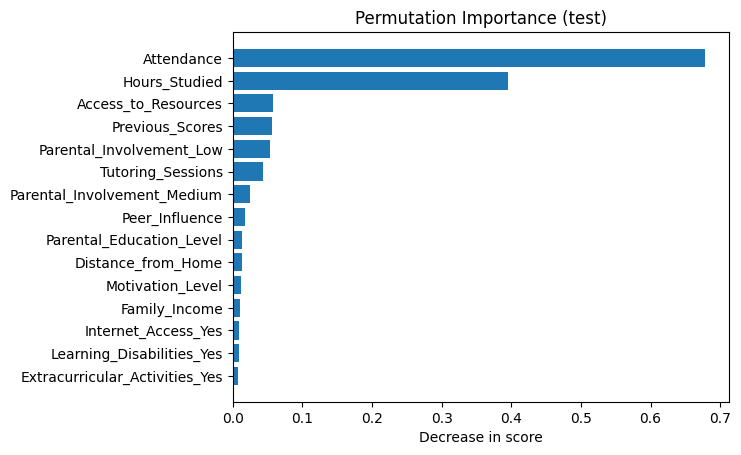

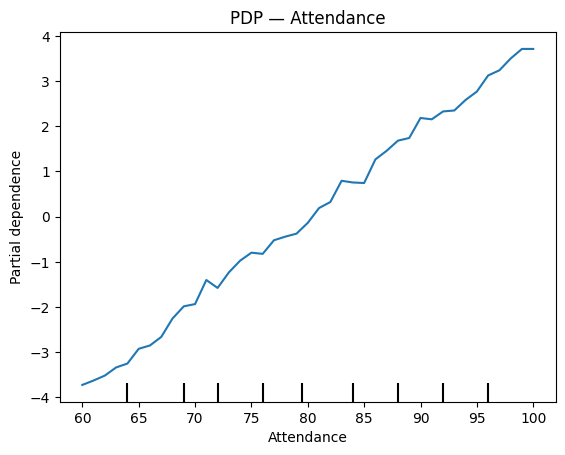

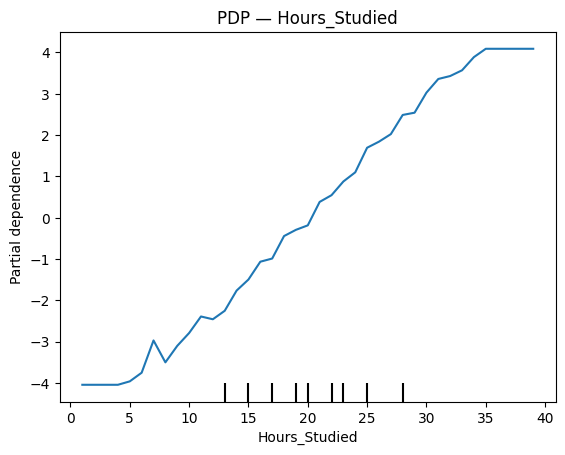

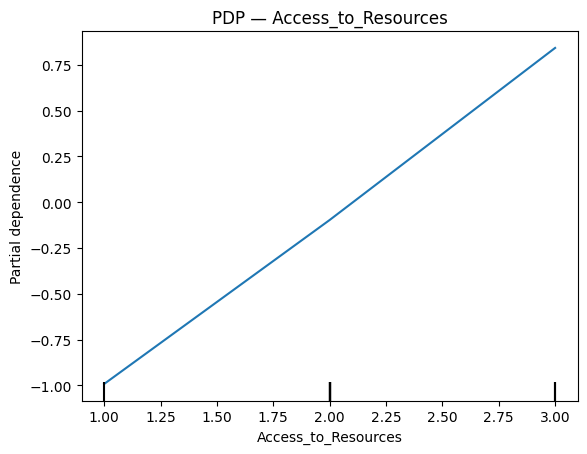

In [86]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt

# 가장 성능이 좋았던 HGB 트리 모형 선택
model = hgb

# 퍼뮤테이션 중요도(검증셋 기준, 편향 적음)
perm = permutation_importance(model, X_test, y_test,
                              n_repeats=10, random_state=42, n_jobs=-1)
imp = (pd.DataFrame({"feature": X.columns,
                     "importance": perm.importances_mean,
                     "std": perm.importances_std})
       .sort_values("importance", ascending=False))

print("\nTop-15 permutation importance")
display(imp.head(15))

# 막대 그래프
top = imp.head(15).iloc[::-1]  # 아래에서 위로
plt.figure()
plt.barh(top["feature"], top["importance"])
plt.title("Permutation Importance (test)")
plt.xlabel("Decrease in score")

# ====== PDP: 상위 3개 변수의 효과 형태 확인 ======
top3 = imp["feature"].head(3).tolist()
for f in top3:
    PartialDependenceDisplay.from_estimator(model, X_test, [f])
    plt.title(f"PDP — {f}")


In [88]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
ranks = []
for tr, te in kf.split(X):
    m = HistGradientBoostingRegressor(random_state=42).fit(X.iloc[tr], y[tr])
    perm = permutation_importance(m, X.iloc[te], y[te], n_repeats=10, random_state=42, n_jobs=-1)
    ranks.append(pd.Series(perm.importances_mean, index=X.columns).rank(ascending=False))
rank_df = pd.concat(ranks, axis=1)
rank_df.mean(axis=1).sort_values().head(10)  # 평균 순위

,0
Attendance,1.0
Hours_Studied,2.0
Previous_Scores,3.4
Access_to_Resources,4.0
Parental_Involvement_Low,4.6
Tutoring_Sessions,6.0
Parental_Involvement_Medium,7.0
Peer_Influence,8.8
Family_Income,9.8
Motivation_Level,10.2


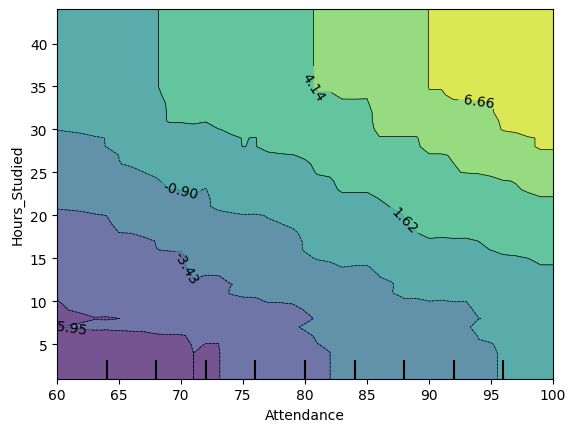

In [89]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(hgb, X, [("Attendance","Hours_Studied")])

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 튜닝할 파라미터 범위 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),      # 학습률
    'max_iter': randint(100, 1000),           # 부스팅 반복 횟수 (트리 개수)
    'max_leaf_nodes': randint(20, 100),       # 트리의 최대 리프 노드 수
    'l2_regularization': uniform(0, 1)        # L2 규제 강도
}

hgb = HistGradientBoostingRegressor(random_state=42)

# RandomizedSearchCV 설정
# n_iter: 랜덤하게 탐색할 횟수, cv: 교차 검증 횟수
random_search = RandomizedSearchCV(
    hgb,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# 최적의 파라미터를 찾아 학습
random_search.fit(X_train, y_train)

# 최적의 파라미터와 최고 점수 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", -random_search.best_score_)

# 최적 모델로 예측 및 최종 평가
best_model = random_search.best_estimator_
pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print(f"Tuned HGB RMSE={rmse:.4f}, R²={r2:.4f}")

Best Parameters: {'l2_regularization': np.float64(0.19427395351204224), 'learning_rate': np.float64(0.024188183399985533), 'max_iter': 499, 'max_leaf_nodes': 33}
Best Score (RMSE): 2.177579783330138
Tuned HGB RMSE=2.1701, R²=0.6991


- 원본 : HGB RMSE = 2.1936, R²= 0.6926
- 튜닝 : HGB RMSE = 2.1701, R²= 0.6991

### 3. 다항 선형 회귀 (Polynomial Regression)

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df_linear.drop(columns = 'Exam_Score').copy()  # 목표변수 제거
y = df_linear['Exam_Score']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_scaled_const = sm.add_constant(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_const, y, test_size=0.2, random_state=100)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}   Test R²: {test_r2:.4f}")

MSE: 3.759569  RMSE: 1.938961  MAE: 0.614456   Test R²: 0.7346


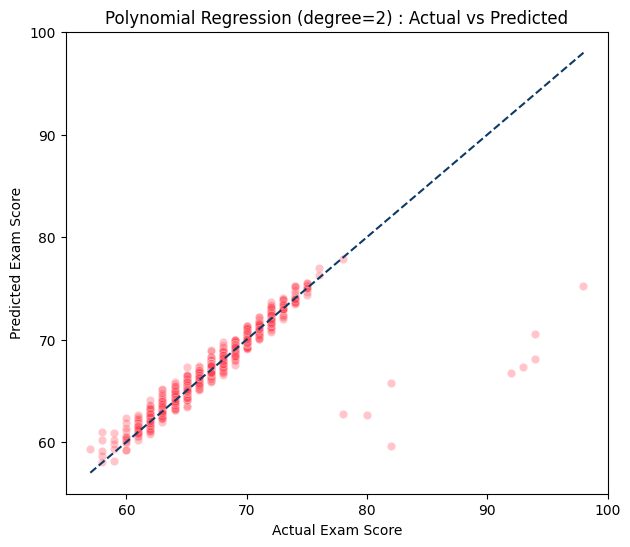

In [93]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Polynomial Regression (degree=2) : Actual vs Predicted")
plt.show()

- 다항분포의 경우 1차 직선 형태인 Linear Regression보다 모델 지표값이 다소 상승한 것을 보인다.
- 기존 선형 회귀 : R²: 0.7180, MAE : 0.51, MSE : 4.33, RMSE : 2.08
- 다항 선형 회귀 : R²: 0.7346, MAE : 0.61, MSE : 3.76, RMSE : 1.94


## 추가 개선 모델링

- 변수 선택기법
- 패널티 선형 회귀(Lasso, Ridge)

### 변수 선택 (Backward selection)

#### 1. 단순 선형 회귀 변수 선택

In [101]:
X = df_linear.drop(columns='Exam_Score').copy()
y = df_linear['Exam_Score']

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled_const = sm.add_constant(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_const, y, test_size=0.2, random_state=100)

def backward_elimination(x_data, y_data, sl=0.05):
    x = x_data.copy()

    while True:
        model = sm.OLS(y_data, x).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value <= sl:
            print("\n후진 제거 완료. 최종 변수들은 모두 유의합니다.")
            break

        feature_to_remove = p_values.drop('const').idxmax()
        x = x.drop(columns=[feature_to_remove])
        print(f"변수 '{feature_to_remove}' 제거 (p-value: {max_p_value:.4f})")

    final_model = sm.OLS(y_data, x).fit()
    print(final_model.summary())
    return x.columns

final_selected_features = backward_elimination(X_train, y_train, sl=0.05)
print("\n최종 선택된 변수:\n", final_selected_features)

X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

model_final = LinearRegression()
model_final.fit(X_train_final, y_train)

y_pred = model_final.predict(X_test_final)
final_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}   Test R²: {test_r2:.4f}")

변수 'School_Type_Public' 제거 (p-value: 0.9112)
변수 'Sleep_Hours' 제거 (p-value: 0.6523)
변수 'Gender_Male' 제거 (p-value: 0.3459)

후진 제거 완료. 최종 변수들은 모두 유의합니다.
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     762.4
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:45:57   Log-Likelihood:                -10979.
No. Observations:                5101   AIC:                         2.199e+04
Df Residuals:                    5083   BIC:                         2.211e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err        

#### 2. 다항 선형 회귀 변수 선택

In [99]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(X_train)

poly_column_names = poly_features.get_feature_names_out(X_train.columns)
x_train_poly_df = pd.DataFrame(x_train_poly, columns=poly_column_names, index=y_train.index)

def backward_elimination(x, y, sl=0.05):
    x_with_const = sm.add_constant(x)
    num_vars = len(x_with_const.columns)

    for i in range(num_vars):
        model = sm.OLS(y, x_with_const).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()

        if max_p_value > sl:
            feature_to_remove = p_values.drop('const').idxmax()
            x_with_const = x_with_const.drop(columns=[feature_to_remove])
            print(f"변수 '{feature_to_remove}' 제거 (p-value: {max_p_value:.4f})")
        else:
            print("\n후진 제거 완료. 최종 선택된 변수들은 모두 유의합니다.")
            break

    final_model = sm.OLS(y, x_with_const).fit()
    print(final_model.summary())
    final_features = x_with_const.columns.drop('const')
    return final_features

# 후진 제거법 실행
final_selected_features = backward_elimination(x_train_poly_df, y_train, sl=0.05)
print("\n최종 선택된 변수:\n", final_selected_features)

x_train_final = x_train_poly_df[final_selected_features]
x_test_poly = poly_features.transform(X_test)
x_test_poly_df = pd.DataFrame(x_test_poly, columns=poly_column_names, index=y_test.index)
x_test_final = x_test_poly_df[final_selected_features]

final_model_sklearn = LinearRegression()
final_model_sklearn.fit(x_train_final, y_train)

# 예측 및 평가
y_test_pred = final_model_sklearn.predict(x_test_final)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}   Test R²: {test_r2:.4f}")

변수 'Sleep_Hours Gender_Male' 제거 (p-value: 0.9989)
변수 'Tutoring_Sessions Distance_from_Home' 제거 (p-value: 0.9937)
변수 'Teacher_Quality Internet_Access_Yes' 제거 (p-value: 0.9825)
변수 'Sleep_Hours School_Type_Public' 제거 (p-value: 0.9817)
변수 'Motivation_Level Parental_Involvement_Low' 제거 (p-value: 0.9719)
변수 'Attendance School_Type_Public' 제거 (p-value: 0.9685)
변수 'Motivation_Level^2' 제거 (p-value: 0.9668)
변수 'Hours_Studied Parental_Involvement_Low' 제거 (p-value: 0.9644)
변수 'Motivation_Level Family_Income' 제거 (p-value: 0.9615)
변수 'Attendance Parental_Involvement_Low' 제거 (p-value: 0.9606)
변수 'Attendance Physical_Activity' 제거 (p-value: 0.9583)
변수 'Tutoring_Sessions Physical_Activity' 제거 (p-value: 0.9513)
변수 'Sleep_Hours Distance_from_Home' 제거 (p-value: 0.9395)
변수 'Sleep_Hours Parental_Education_Level' 제거 (p-value: 0.9348)
변수 'Family_Income School_Type_Public' 제거 (p-value: 0.9287)
변수 'Gender_Male Internet_Access_Yes' 제거 (p-value: 0.9263)
변수 'Learning_Disabilities_Yes' 제거 (p-value: 0.9152)
변수 'Extra

- 기존 선형 회귀
> R²: 0.7180, MAE : 0.51, MSE : 4.33, RMSE : 2.08
- 다항 선형 회귀
> R²: 0.7346, MAE : 0.61, MSE : 3.76, RMSE : 1.94
- 변수 선택 단순 선형 회귀 (변수 3개 제거)
> R²: 0.7463, MAE : 0.49, MSE : 3.55  RMSE : 1.88
- 변수 선택 다항 회귀
> R²: 0.7463, MAE : 0.51, MSE : 3.59, RMSE : 1.89

### 패널티 기법 (Lasso)

In [102]:
from sklearn.linear_model import Lasso, LassoCV
X = df_linear.drop(columns='Exam_Score').copy()
y = df_linear['Exam_Score']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

lasso_model = Lasso(alpha=0.1, random_state=100)
lasso_model.fit(X_train, y_train)

coefficients = pd.Series(lasso_model.coef_, index=X_train.columns)
print("## Lasso 모델의 계수 (alpha=0.1) ##")
print(coefficients)

selected_features = coefficients[coefficients != 0].index
print(f"\n총 {len(X_train.columns)}개 변수 중 {len(selected_features)}개 선택됨.")
print("선택된 변수:", list(selected_features))

y_pred = lasso_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}   Test R²: {test_r2:.4f}")

## Lasso 모델의 계수 (alpha=0.1) ##
Hours_Studied                     1.641152
Attendance                        2.185468
Access_to_Resources               0.625671
Sleep_Hours                       0.000000
Previous_Scores                   0.592918
Motivation_Level                  0.272716
Tutoring_Sessions                 0.492908
Family_Income                     0.276556
Teacher_Quality                   0.226297
Peer_Influence                    0.293049
Physical_Activity                 0.072322
Parental_Education_Level          0.296821
Distance_from_Home               -0.235259
Gender_Male                      -0.000000
School_Type_Public               -0.000000
Extracurricular_Activities_Yes    0.167638
Internet_Access_Yes               0.181063
Learning_Disabilities_Yes        -0.154149
Parental_Involvement_Low         -0.593855
Parental_Involvement_Medium      -0.334966
dtype: float64

총 20개 변수 중 17개 선택됨.
선택된 변수: ['Hours_Studied', 'Attendance', 'Access_to_Resources', 'Previous_

In [105]:
lasso_cv_model = LassoCV(cv=5, random_state=100, max_iter=10000)
lasso_cv_model.fit(X_train, y_train)

best_alpha = lasso_cv_model.alpha_
print(f"최적의 alpha 값: {best_alpha:.4f}")

coefficients_cv = pd.Series(lasso_cv_model.coef_, index=X_train.columns)
print("\n## LassoCV 모델의 계수 ##")
print(coefficients_cv)

selected_features_cv = coefficients_cv[coefficients_cv != 0].index
print(f"\n총 {len(X_train.columns)}개 변수 중 {len(selected_features_cv)}개 선택됨.")
print("선택된 변수:", list(selected_features_cv))

y_pred_cv = lasso_cv_model.predict(X_test)
r2_cv = r2_score(y_test, y_pred_cv)
mae_cv = mean_absolute_error(y_test, y_pred_cv)
mse_cv = mean_squared_error(y_test, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)
print(f"\n MSE: {mse_cv:.6f}  RMSE: {rmse_cv:.6f}  MAE: {mae_cv:.6f}   Test R²: {r2_cv:.4f}")

최적의 alpha 값: 0.0064

## LassoCV 모델의 계수 ##
Hours_Studied                     1.735792
Attendance                        2.280357
Access_to_Resources               0.728961
Sleep_Hours                       0.006320
Previous_Scores                   0.690388
Motivation_Level                  0.366624
Tutoring_Sessions                 0.588039
Family_Income                     0.374994
Teacher_Quality                   0.319282
Peer_Influence                    0.387268
Physical_Activity                 0.180671
Parental_Education_Level          0.391580
Distance_from_Home               -0.326468
Gender_Male                      -0.020860
School_Type_Public               -0.000000
Extracurricular_Activities_Yes    0.267302
Internet_Access_Yes               0.279422
Learning_Disabilities_Yes        -0.245764
Parental_Involvement_Low         -0.790630
Parental_Involvement_Medium      -0.533171
dtype: float64

총 20개 변수 중 19개 선택됨.
선택된 변수: ['Hours_Studied', 'Attendance', 'Access_to_Resources',

### 패널티 기법 (Ridge)

In [108]:
from sklearn.linear_model import Ridge, RidgeCV

X = df_linear.drop(columns='Exam_Score').copy()
y = df_linear['Exam_Score']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

ridge_model = Ridge(alpha=1.0, random_state=100)
ridge_model.fit(X_train, y_train)

coefficients = pd.Series(ridge_model.coef_, index=X_train.columns)
print("## Ridge 모델의 계수 (alpha=1.0) ##")
print(coefficients)

y_pred_rg = ridge_model.predict(X_test)
r2_rg = r2_score(y_test, y_pred_rg)
mae_rg = mean_absolute_error(y_test, y_pred_rg)
mse_rg = mean_squared_error(y_test, y_pred_rg)
rmse_rg = np.sqrt(mse)

print(f"\n MSE: {mse_rg:.6f}  RMSE: {rmse_rg:.6f}  MAE: {mae_rg:.6f}   Test R²: {r2_rg:.4f}")

## Ridge 모델의 계수 (alpha=1.0) ##
Hours_Studied                     1.741814
Attendance                        2.286548
Access_to_Resources               0.735923
Sleep_Hours                       0.013140
Previous_Scores                   0.697199
Motivation_Level                  0.373175
Tutoring_Sessions                 0.594513
Family_Income                     0.381834
Teacher_Quality                   0.325596
Peer_Influence                    0.393824
Physical_Activity                 0.188027
Parental_Education_Level          0.397845
Distance_from_Home               -0.332743
Gender_Male                      -0.027468
School_Type_Public               -0.003265
Extracurricular_Activities_Yes    0.274096
Internet_Access_Yes               0.286288
Learning_Disabilities_Yes        -0.252220
Parental_Involvement_Low         -0.803822
Parental_Involvement_Medium      -0.546482
dtype: float64

 MSE: 3.554727  RMSE: 1.885398  MAE: 0.488790   Test R²: 0.7491


In [110]:
alphas = np.logspace(-3, 2, 100)

ridge_cv_model = RidgeCV(alphas=alphas, cv=5)
ridge_cv_model.fit(X_train, y_train)

best_alpha = ridge_cv_model.alpha_
print(f"최적의 alpha 값: {best_alpha:.4f}")

coefficients_cv = pd.Series(ridge_cv_model.coef_, index=X_train.columns)
print("\n## RidgeCV 모델의 계수 ##")
print(coefficients_cv)

y_pred_rgcv = ridge_cv_model.predict(X_test)
r2_rgcv = r2_score(y_test, y_pred_rgcv)
mae_rgcv = mean_absolute_error(y_test, y_pred_rgcv)
mse_rgcv = mean_squared_error(y_test, y_pred_rgcv)
rmse_rgcv = np.sqrt(mse)

print(f"\n MSE: {mse_rgcv:.6f}  RMSE: {rmse_rgcv:.6f}  MAE: {mae_rgcv:.6f}   Test R²: {r2_rgcv:.4f}")

최적의 alpha 값: 8.6975

## RidgeCV 모델의 계수 ##
Hours_Studied                     1.739168
Attendance                        2.283057
Access_to_Resources               0.734698
Sleep_Hours                       0.013034
Previous_Scores                   0.696116
Motivation_Level                  0.372591
Tutoring_Sessions                 0.593567
Family_Income                     0.381247
Teacher_Quality                   0.325122
Peer_Influence                    0.393196
Physical_Activity                 0.187593
Parental_Education_Level          0.397299
Distance_from_Home               -0.332310
Gender_Male                      -0.027438
School_Type_Public               -0.003328
Extracurricular_Activities_Yes    0.273587
Internet_Access_Yes               0.285839
Learning_Disabilities_Yes        -0.251977
Parental_Involvement_Low         -0.801510
Parental_Involvement_Medium      -0.544463
dtype: float64

 MSE: 3.554684  RMSE: 1.885398  MAE: 0.489010   Test R²: 0.7491


## 모델 평가

1. 선형 모델이 왜 잘 나왔을까?
- 선형 모델의 $R^2$가 0.718로 현재 가장 높게 나온 것은 데이터의 피쳐들과 목표변수(Exam_Score) 사이에 강한 '선형 관계'가 존재함을 의미한다. 즉, 피쳐들이 일정하게 오를 수록 성적도 올라간다는 직선적인 관계를 잘 설명한다고 할 수있다.
- 선형 모델은 단순하지만 데이터가 선형적일 경우 매우 강력하게 해석된다.

2. 트리 모델은 왜 뒤쳐졌을까?
- 트리 모델(RandomForest, XGBoost, HGB)는 '비선형 관계'와 '특성의 중요도 및 상호작용'에 중점인 모델이다. 트리 모델의 경우 피처의 수가 많을수록 더 좋은 적합도를 보이는 경우가 대부분이라, 아마 트리 모델이 뒤쳐진 이유가 충분한 피처를 제공받지 못했을 가능성이 매우 크다고 볼 수 있다.
- 원본HGB : HGB RMSE = 2.1936, R²= 0.6926
- 튜닝HGB : HGB RMSE = 2.1701, R²= 0.6991

3. 전체 모델 평가
- 현재 데이터는 선형 모델이 가장 우수하다고 볼 수 있다. 이는 데이터가 강한 선형적인 관계를 가지고 있다는 것으로 볼 수 있다.
- 현재 트리 모델은 랜덤그리드서치를 통해서 최적의 파라미터를 찾아서 학습을 했음에도 선형 모델에 뒤쳐지는 것을 확인할 수 있다.


4. 변수 선택 (Backward Selection)
> - 기존 선형 회귀
>> R²: 0.7180, MAE : 0.51, MSE : 4.33, RMSE : 2.08
> - 다항 선형 회귀
>> R²: 0.7346, MAE : 0.61, MSE : 3.76, RMSE : 1.94
> - 변수 선택 단순 선형 회귀
>> R²: 0.7463, MAE : 0.49, MSE : 3.55  RMSE : 1.88
> - 변수 선택 다항 회귀
>> R²: 0.7463, MAE : 0.51, MSE : 3.59, RMSE : 1.89

- 단순 선형회귀 모형에서 p-value가 큰 3개의 변수를 제거한 모델이 가장 설명력이 높음을 알 수 있다.

5. Lasso 패널티 기법
- 단순히 Lasso(alpha = 0.1)를 적용하였을 때, Lasso의 경우 단순 선형회귀 후진선택법과 동일하게 3개의 변수를 제거하였다.
- 계수상으로 가장 영향력을 많이 미치는 변수로 Attendance와 Hours_Studied을 확인하였다.
- R²: 0.7406, MAE : 0.61, MSE : 3.67, RMSE : 1.92

5-1. LassoCV 최적화
- 최적의 alpha = 0.0064
> - 규제 강도가 생각보다 많이 약하다.
- 변수 선택을 20개 중 19개를 선택하였다.
> - School_Type_Public 변수만 제거하였다.
- R²: 0.7495, MAE : 0.49, MSE : 3.55, RMSE : 1.88

6. Ridge 패널티 기법
- 모든 변수 사용하였다. (변수 제거 없음)
- R²: 0.7491, MAE : 0.49, MSE : 3.55, RMSE : 1.88

6-1. RidgeCV 최적화
- 최적의 alpha = 8.6975
- 규제를 강화하나, 변수를 제거하지는 않는다.
- R²: 0.7491, MAE : 0.49, MSE : 3.55, RMSE : 1.89


## 결론

1. 프로젝트 목적 및 요약
- 'Exam_Score'에 미치는 요인을 파악하고 이를 성장시키기 위한 예측을 위해 다양한 머신러닝 모델을 적용하여 평가하고 최적의 모델을 찾아보았다.
- 분석 결과, 현재 데이터셋은 매우 강한 선형적인 특성을 보였으며, 이를 바탕으로 LassoCV(L1 규제가 적용된 선형 모델)가 가장 우수한 예측 성능을 보였다.

2. Key 발견하기
- 데이터의 강한 선형성
> - 현 데이터는 복잡한 비선형 관계보다는 단순하고 강력한 선형 관계가 뚜렷히 보인다.
> - 그 근거로 다양한 트리 기반 모델(RandomForest, XGBoost, HistGradientBoosting)보다 다양한 선형 회귀 모델(Linear Regression, Polynomial Regression, LassoCV, RidgeCV)이 월등히 높은 성능을 기록했다.
> - 이는 피처의 값이 증가할 때 시험 점수도 일정하게 증/감하는 선형적인 관계가 이 데이터의 패턴을 가장 잘 설명한다는 것을 의미한다.
> - 트리 모델은 이 데이터에서 강점인 비선형 패턴을 찾지 못해서 오히려 성능이 저하된 모습을 보였다.

- 최적 모델 찾기
> - 단순 선형 회귀와 비교하여 다양한 방법을 추구하여 가장 우수한 모델을 찾기 위해 노력했다.
> - 후진 제거법, Lasso패널티, Ridge패널티 모델들이 단순 선형 모형을 상회하여 LassoCV같은 경우 R2 = 0.749까지 도달했음을 알 수 있다.
>> - 이는 통계적으로 중요하지 않은 변수를 제거하거나 패널티를 부여하여 성능을 향상시킴을 의미한다.

- 주요 예측 변수 식별
> - 목표 변수인 'Exam_Score'에 영향을 가장 많이 미치는 변수를 파악하는게 주 목적이었다.
> - 다양한 우수 모델에서 영향력이 큰 공통된 변수를 확인할 수 있었다.
> - Attendance(출석률)과 Hours_Studied(공부 시간)이 가장 큰 긍정적인 영향을 미치는 변수로 나타났으며, 영향은 크지 않지만 부정적인 영향으로 Parental_Involvement_Low(부모의 교육 참여 수준이 낮음) 변수를 확인할 수 있었다.


3. 최종적인 모델
- LassoCV 회귀 모델
> - R²: 0.7495, MAE : 0.49, MSE : 3.55, RMSE : 1.88
> - 선택된 변수 : 19개 (School_Type_Public 변수 제거)

- 현재의 데이터셋은 선형성이 뚜렷하므로, 복잡한 딥러닝이나 추가적인 앙상블 모델을 도입하기보다는 Lasso를 통한 선형 회귀 모델을 활용하는 것이 비용 및 효율성 측면에서 가장 좋은 모습을 보인다.
> - 이는 데이터 셋을 파악하는게 가장 중요하며, 단순히 'XGBoost, LightGBM, 딥러닝모델이 가장 좋다' 라는 편견을 버리고 데이터 셋에 대해 집중해야함을 알 수 있었다.

4. 현재 모델링을 한 후의 정책 및 제언
- 향후 시험 점수를 예측하고 상승시키기 위해서는 '출석률'과 '학생의 공부 시간'을 관리하고 지원하는 방안에 집중을 해야한다.
> - 이는 학생의 공부 참여도와 열정이 성적에 있어 가장 중요하다는 것을 알 수 있다.
- 또한 '부모의 교육 참여'가 너무 낮지 않도록 부모의 관심이 필요하다는 것을 알 수 있다.
> - 이는 부모의 학습 참여와 더불어 학생이 원하는 공부를 지원하는 방안을 모색하는게 좋아보인다.